# HEART FAILURE TO DEATH

# Why Does Heart failure need machine learning? 

# What are some benefits from Heart failure machine learnings? 

# Limitaions of Heart failure machine learnings?


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns



In [28]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

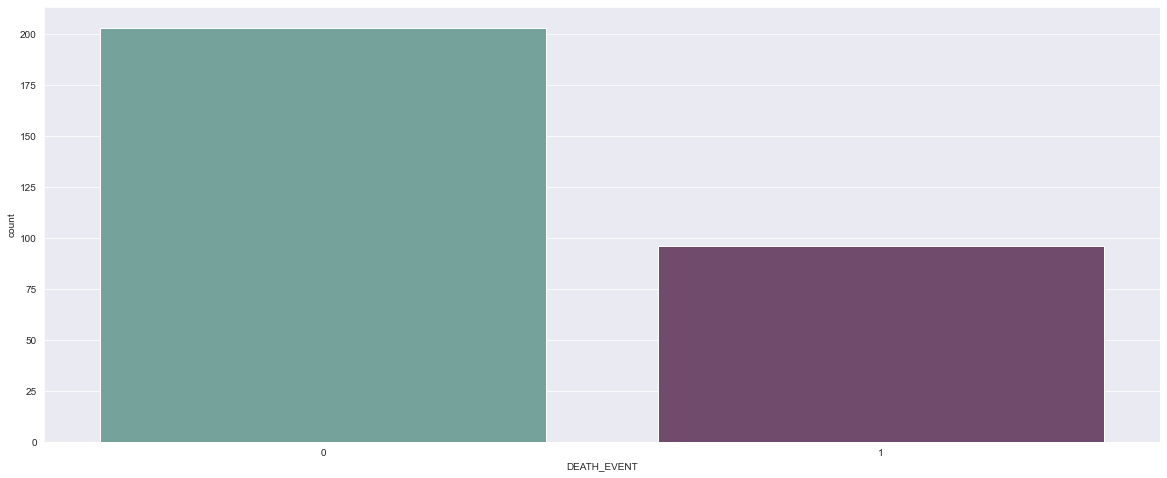

In [30]:
#first of all let us evaluate the target and find out if our data is imbalanced or not 
cols= ["#6daa9f","#774571"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

In [31]:
# Point to note is that there is an imbalance in the data

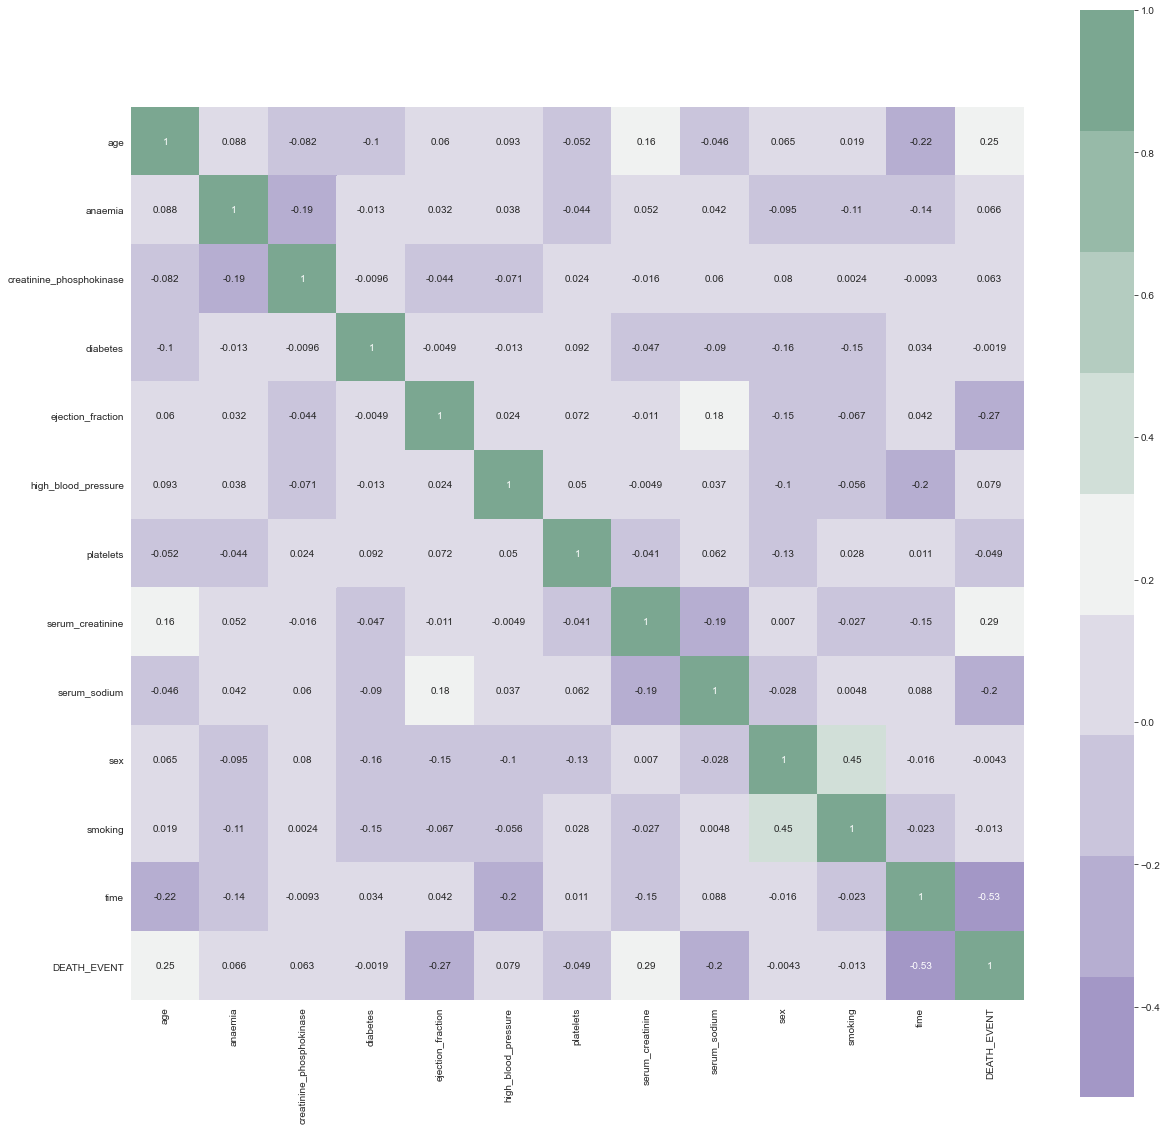

In [32]:
#Examaning a corelation matrix of all the features 
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

In [33]:
corrmat[abs(corrmat['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix


In [35]:
y = data['DEATH_EVENT']
X = data.drop('DEATH_EVENT', axis =1)

In [36]:
#we need to put all X data together by scaled Data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0.946619
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0.950178
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0.975089
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,0.982206


In [44]:
#because our dataset is relatively small we can put trainsize to 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
accuracy_list = []
f1_list =[]
model_list = ['Logistic Regression', 'SVC','KNearestNeighbours', 'DecisionTree', 'Neural Network']

In [56]:
model = LogisticRegression()
model.fit(X_train, y_train)
log_y_predict = model.predict(X_test)
Log_accuracy = model.score(X_test, y_test)
accuracy_list.append(100*Log_accuracy)

Log_f1 = f1_score(y_test, log_y_predict)
f1_list.append(100*Log_f1)

print(f"Logistic Regression:\nAccuracy: {Log_accuracy}\nF1 Score: {Log_f1}\n")

Logistic Regression:
Accuracy: 0.8166666666666667
F1 Score: 0.717948717948718



In [46]:
model = SVC()
model.fit(X_train, y_train)
svm_y_predict = model.predict(X_test)

svm_accuracy = model.score(X_test, y_test)
accuracy_list.append(100*svm_accuracy)

svm_f1 = f1_score(y_test, svm_y_predict)
f1_list.append(100*svm_f1)

print(f"Support Vector Machine:\nAccuracy: {svm_accuracy}\nF1 Score: {svm_f1}\n")

Support Vector Machine:
Accuracy: 0.8
F1 Score: 0.6842105263157895



In [47]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train,y_train)
knn_y_predict = model.predict(X_test)

knn_accuracy = model.score(X_test, y_test)
accuracy_list.append(100*knn_accuracy)

knn_f1 = f1_score(y_test, knn_y_predict)
f1_list.append(100*knn_f1)
print(f"K Neighbors Classifier :\nAccuracy: {knn_accuracy}\nF1 Score: {knn_f1}\n")

K Neighbors Classifier :
Accuracy: 0.65
F1 Score: 0.16



In [48]:
model = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
model.fit(X_train,y_train)
dt_y_predict = model.predict(X_test)

dt_accuracy = model.score(X_test, y_test)
accuracy_list.append(100*dt_accuracy)

dt_f1 = f1_score(y_test, dt_y_predict)
f1_list.append(100*dt_f1)
print(f"Decision Tree Classifier :\nAccuracy: {dt_accuracy}\nF1 Score: {dt_f1}\n")

Decision Tree Classifier :
Accuracy: 0.7833333333333333
F1 Score: 0.6666666666666667



In [49]:
model = MLPClassifier(hidden_layer_sizes = (128,128))
model.fit(X_train, y_train)
nn_y_predict = model.predict(X_test)

nn_accuracy = model.score(X_test, y_test)
accuracy_list.append(100*nn_accuracy)

nn_f1 = f1_score(y_test, nn_y_predict)
f1_list.append(100*nn_f1)
print(f"Neural Network :\nAccuracy:{nn_accuracy}\nF1 Score: {nn_f1}\n")

Neural Network :
Accuracy:0.7666666666666667
F1 Score: 0.6818181818181819



C:\Users\aufb\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [50]:
#according to table from BMC 
# https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/4
# OUR TEST result pretty good(accurate)

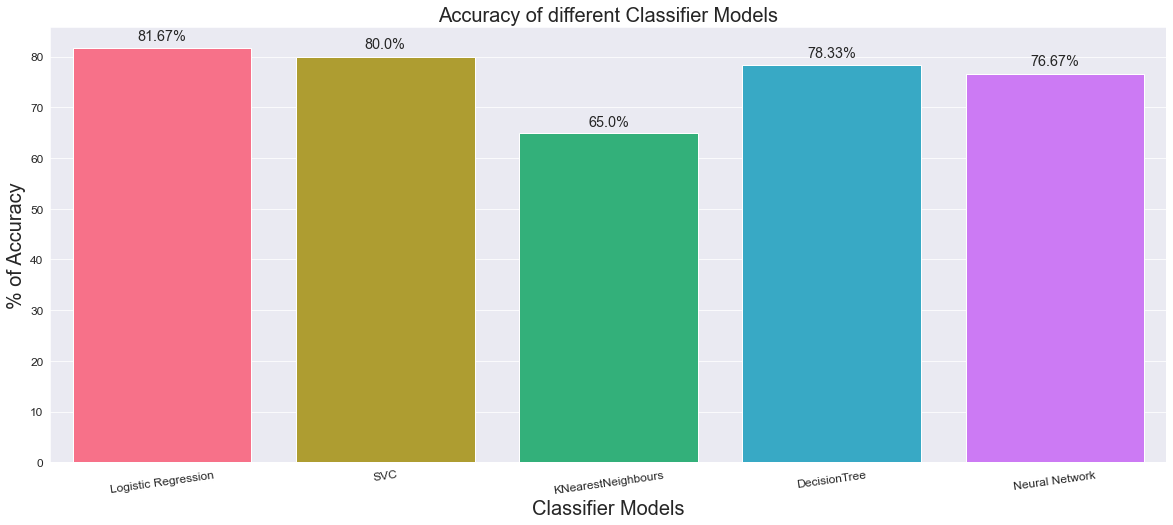

In [51]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list,  palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [52]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,log_y_predict)
cm_svm = confusion_matrix(y_test,svm_y_predict)
cm_knn = confusion_matrix(y_test,knn_y_predict)
cm_dtc = confusion_matrix(y_test,dt_y_predict)
cm_nn = confusion_matrix(y_test,nn_y_predict)



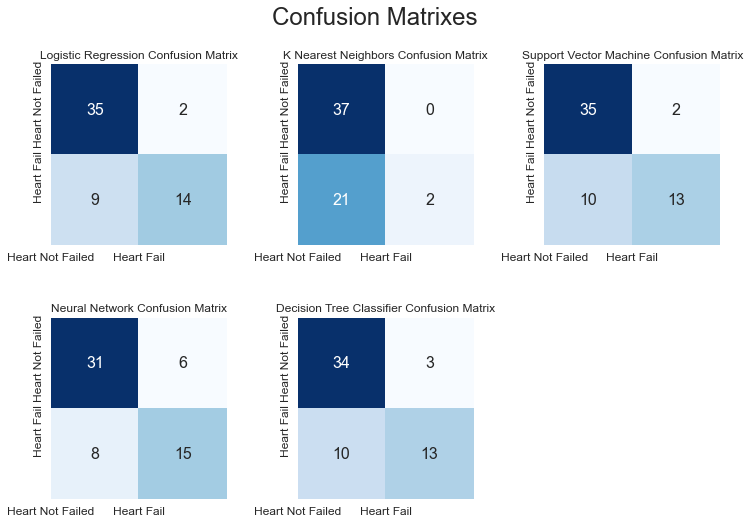

In [70]:
plt.figure(figsize=(12,8))


plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)


plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 16})
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=12)

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 16})
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=12)


plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 16})
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=12)


plt.subplot(2,3,4)
plt.title("Neural Network Confusion Matrix")
sns.heatmap(cm_nn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 16})
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=12)


plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 16})
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=12)



plt.show()